In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('ggplot')

In [3]:
# Load the optimization results
with open('results/optimization_results.pkl', 'rb') as f:
    optimization_results = pickle.load(f)

# Print out the metrics for each number of layers
for result in optimization_results:
    num_layers = result['num_layers']
    single_shot_metrics = result['single_shot']
    ar_metrics = result['auto_regressive']

    print(f"Number of Layers: {num_layers}")
    print("Single Shot Model Metrics:")
    print(f"  - Test Loss: {single_shot_metrics[0]}")
    print(f"  - Test RMSE: {single_shot_metrics[1]}")
    print(f"  - Test MAE: {single_shot_metrics[2]}")
    print(f"  - Test R^2: {single_shot_metrics[3]}")
    
    print("Auto-Regressive Model Metrics:")
    print(f"  - Test Loss: {ar_metrics[0]}")
    print(f"  - Test RMSE: {ar_metrics[1]}")
    print(f"  - Test MAE: {ar_metrics[2]}")
    print(f"  - Test R^2: {ar_metrics[3]}")
    print("--------------------------------------------------")

Number of Layers: 1
Single Shot Model Metrics:
  - Test Loss: 0.00904266943258268
  - Test RMSE: 0.09099400857532466
  - Test MAE: 0.07147906417096103
  - Test R^2: 0.8373687655977177
Auto-Regressive Model Metrics:
  - Test Loss: 0.0014563204614980215
  - Test RMSE: 0.03675210800159861
  - Test MAE: 0.028033807494298176
  - Test R^2: 0.975039394630084
--------------------------------------------------
Number of Layers: 2
Single Shot Model Metrics:
  - Test Loss: 0.010415883441628129
  - Test RMSE: 0.09849354114245486
  - Test MAE: 0.07740307102600734
  - Test R^2: 0.7742484142682502
Auto-Regressive Model Metrics:
  - Test Loss: 0.001668656609210841
  - Test RMSE: 0.040188532391632045
  - Test MAE: 0.029160126629802916
  - Test R^2: 0.9737188255276448
--------------------------------------------------
Number of Layers: 3
Single Shot Model Metrics:
  - Test Loss: 0.012037686913067268
  - Test RMSE: 0.10486891120672226
  - Test MAE: 0.08336971141397953
  - Test R^2: 0.7917288467534688
Aut

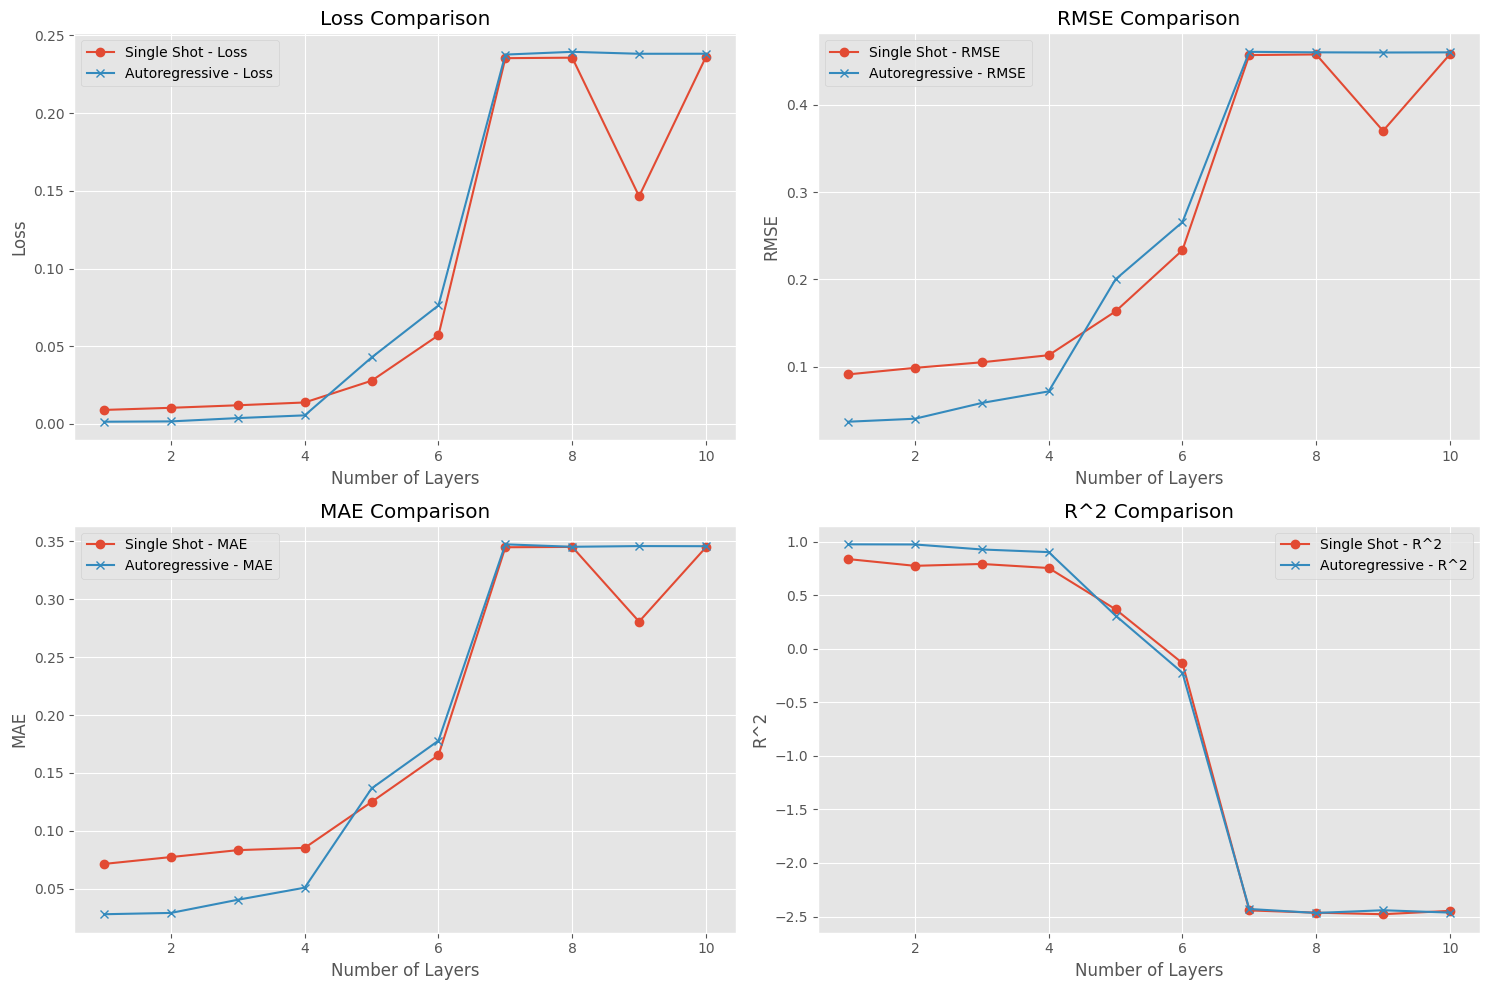

In [15]:
import matplotlib.pyplot as plt

# Assuming optimization_results is a list of dictionaries with keys 'num_layers', 'single_shot', and 'auto_regressive'
# Each entry in 'single_shot' and 'auto_regressive' is a list or tuple with metrics in the order [loss, RMSE, MAE, R^2]

# Initialize lists to store metrics for plotting
layers = []
single_shot_loss = []
single_shot_rmse = []
single_shot_mae = []
single_shot_r2 = []

ar_loss = []
ar_rmse = []
ar_mae = []
ar_r2 = []

# Extract metrics for the specified layers
for result in optimization_results:
    layers.append(result['num_layers'])
    single_shot_metrics = result['single_shot']
    ar_metrics = result['auto_regressive']

    # Append single shot model metrics
    single_shot_loss.append(single_shot_metrics[0])
    single_shot_rmse.append(single_shot_metrics[1])
    single_shot_mae.append(single_shot_metrics[2])
    single_shot_r2.append(single_shot_metrics[3])

    # Append auto-regressive model metrics
    ar_loss.append(ar_metrics[0])
    ar_rmse.append(ar_metrics[1])
    ar_mae.append(ar_metrics[2])
    ar_r2.append(ar_metrics[3])

# Plotting
plt.figure(figsize=(15, 10))

# Plot for Loss
plt.subplot(2, 2, 1)
plt.plot(layers, single_shot_loss, label='Single Shot - Loss', marker='o')
plt.plot(layers, ar_loss, label='Autoregressive - Loss', marker='x')
plt.xlabel('Number of Layers')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Plot for RMSE
plt.subplot(2, 2, 2)
plt.plot(layers, single_shot_rmse, label='Single Shot - RMSE', marker='o')
plt.plot(layers, ar_rmse, label='Autoregressive - RMSE', marker='x')
plt.xlabel('Number of Layers')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.legend()

# Plot for MAE
plt.subplot(2, 2, 3)
plt.plot(layers, single_shot_mae, label='Single Shot - MAE', marker='o')
plt.plot(layers, ar_mae, label='Autoregressive - MAE', marker='x')
plt.xlabel('Number of Layers')
plt.ylabel('MAE')
plt.title('MAE Comparison')
plt.legend()

# Plot for R^2
plt.subplot(2, 2, 4)
plt.plot(layers, single_shot_r2, label='Single Shot - R^2', marker='o')
plt.plot(layers, ar_r2, label='Autoregressive - R^2', marker='x')
plt.xlabel('Number of Layers')
plt.ylabel('R^2')
plt.title('R^2 Comparison')
plt.legend()

plt.tight_layout()
plt.savefig('figures/Model Size Comparison.jpg', format='jpg', bbox_inches='tight', dpi = 300)
plt.show()


In [5]:
# Initialize variables to store best model info
best_loss = float('inf')
best_model_layers = None
best_model_metrics = None

# Iterate through the optimization results
for result in optimization_results:
    num_layers = result['num_layers']
    single_shot_metrics = result['single_shot']
    ar_metrics = result['auto_regressive']

    # Check if the current model has the lowest loss
    current_loss = min(single_shot_metrics[0], ar_metrics[0])
    if current_loss < best_loss:
        best_loss = current_loss
        best_model_layers = num_layers
        best_model_metrics = {
            'single_shot': single_shot_metrics,
            'auto_regressive': ar_metrics
        }

# Print best model details
print(f"Best Model Layers: {best_model_layers}")
print("Best Model Metrics:")
print(f"  Single Shot Model: Loss - {best_model_metrics['single_shot'][0]}, RMSE - {best_model_metrics['single_shot'][1]}, MAE - {best_model_metrics['single_shot'][2]}, R^2 - {best_model_metrics['single_shot'][3]}")
print(f"  Auto-Regressive Model: Loss - {best_model_metrics['auto_regressive'][0]}, RMSE - {best_model_metrics['auto_regressive'][1]}, MAE - {best_model_metrics['auto_regressive'][2]}, R^2 - {best_model_metrics['auto_regressive'][3]}")


Best Model Layers: 1
Best Model Metrics:
  Single Shot Model: Loss - 0.00904266943258268, RMSE - 0.09099400857532466, MAE - 0.07147906417096103, R^2 - 0.8373687655977177
  Auto-Regressive Model: Loss - 0.0014563204614980215, RMSE - 0.03675210800159861, MAE - 0.028033807494298176, R^2 - 0.975039394630084


In [6]:
# Informer Results
import numpy as np
import pickle

metrics = np.load('informer_results/metrics.npy')
inputs = np.load('informer_results/input.npy')
predictions = np.load('informer_results/pred.npy')
true_values = np.load('informer_results/true.npy')

mae = metrics[0]
mse = metrics[1]
rmse = metrics[2]
mape = metrics[3]
mspe = metrics[4]

results = {
    'mae': mae,
    'mse': mse,
    'rmse': rmse,
    'mape': mape,
    'mspe': mspe,
    'inputs': inputs,
    'predictions': predictions,
    'true_values': true_values
}

with open('informer_results/full_results.pkl', 'wb') as f:
    pickle.dump(results, f)


No Overlap Single Shot Model
Loss (MSE): 0.014609364792704582 | RMSE: 0.1199866955478986 | MAE: 0.08321057508389156
No Overlap Autoregressive Model
Loss (MSE): 0.006445898053546746 | RMSE: 0.07919661949078242 | MAE: 0.056023430079221725
Informer Model
Loss (MSE): 0.13903681933879852 | RMSE: 0.3728764057159424 | MAE: 0.26411956548690796


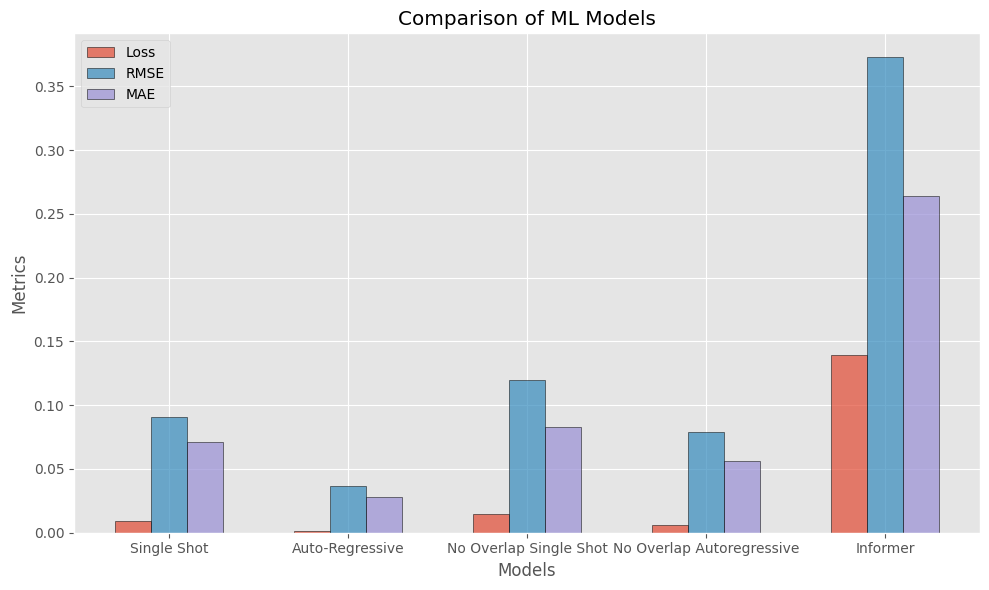

In [7]:

single_shot_metrics = best_model_metrics['single_shot']
auto_regressive_metrics = best_model_metrics['auto_regressive']

with open('informer_results/full_results.pkl', 'rb') as f:
    informer_metrics = pickle.load(f)

with open('results/no_overlap.pkl', 'rb') as f:
    no_overlap_metrics = pickle.load(f)
    no_overlap_single_shot_metrics = no_overlap_metrics['single_shot']
    no_overlap_ar_metrics = no_overlap_metrics['auto_regressive']

models = ['Single Shot', 'Auto-Regressive', 'Informer']
loss = [single_shot_metrics[0], auto_regressive_metrics[0], informer_metrics['mse']]
rmse = [single_shot_metrics[1], auto_regressive_metrics[1], informer_metrics['rmse']]
mae = [single_shot_metrics[2], auto_regressive_metrics[2], informer_metrics['mae']]

models = ['Single Shot', 'Auto-Regressive', 'No Overlap Single Shot', 'No Overlap Autoregressive', 'Informer']
loss = [single_shot_metrics[0], auto_regressive_metrics[0], no_overlap_single_shot_metrics[0], no_overlap_ar_metrics[0], informer_metrics['mse']]
rmse = [single_shot_metrics[1], auto_regressive_metrics[1], no_overlap_single_shot_metrics[1], no_overlap_ar_metrics[1], informer_metrics['rmse']]
mae = [single_shot_metrics[2], auto_regressive_metrics[2], no_overlap_single_shot_metrics[2], no_overlap_ar_metrics[2], informer_metrics['mae']]

print(f"No Overlap Single Shot Model")
print(f"Loss (MSE): {loss[2]} | RMSE: {rmse[2]} | MAE: {mae[2]}")

print(f"No Overlap Autoregressive Model")
print(f"Loss (MSE): {loss[3]} | RMSE: {rmse[3]} | MAE: {mae[3]}")

print(f"Informer Model")
print(f"Loss (MSE): {loss[4]} | RMSE: {rmse[4]} | MAE: {mae[4]}")

x = range(len(models))
width = 0.2

# Plotting
plt.figure(figsize=(10, 6))  # Adjusting the size of the figure
plt.bar(x, loss, width, label='Loss', align='center', alpha=0.7, edgecolor='black')
plt.bar([i + width for i in x], rmse, width, label='RMSE', align='center', alpha=0.7, edgecolor='black')
plt.bar([i + width*2 for i in x], mae, width, label='MAE', align='center', alpha=0.7, edgecolor='black')

plt.xlabel('Models')
plt.ylabel('Metrics')   
plt.title('Comparison of ML Models')
plt.xticks([i + width for i in x], models)
plt.tight_layout()
plt.legend()
plt.savefig('figures/Informer Comparison.jpg', format='jpg', bbox_inches='tight', dpi = 300)


plt.show()


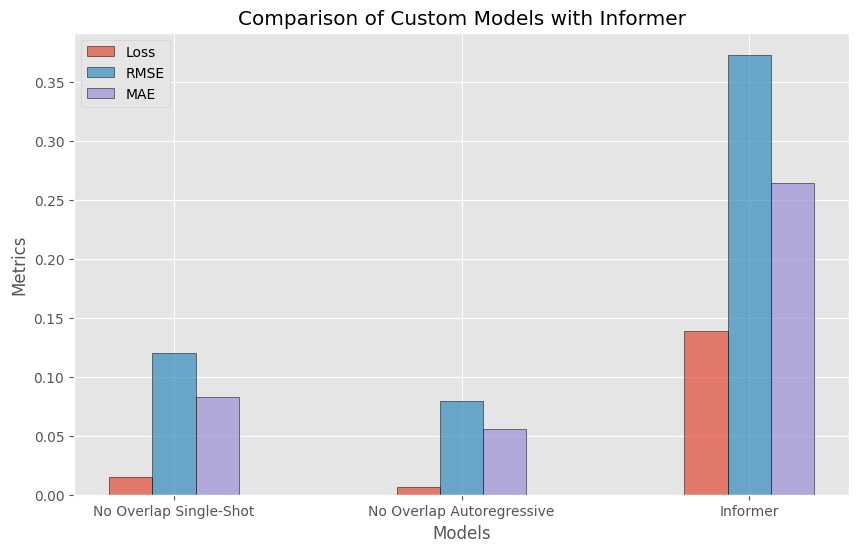

In [13]:
import matplotlib.pyplot as plt

# Adjusting the models and metrics to include only No Overlap Single Shot, No Overlap Autoregressive, and Informer
models = ['No Overlap Single-Shot', 'No Overlap Autoregressive', 'Informer']
loss = [no_overlap_single_shot_metrics[0], no_overlap_ar_metrics[0], informer_metrics['mse']]
rmse = [no_overlap_single_shot_metrics[1], no_overlap_ar_metrics[1], informer_metrics['rmse']]
mae = [no_overlap_single_shot_metrics[2], no_overlap_ar_metrics[2], informer_metrics['mae']]

# Setting up the x-axis for the bar chart
x = range(len(models))
width = 0.15

# Plotting
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, loss, width, label='Loss', align='center', alpha=0.7, edgecolor='black')
bars2 = plt.bar([p + width for p in x], rmse, width, label='RMSE', align='center', alpha=0.7, edgecolor='black')
bars3 = plt.bar([p + width*2 for p in x], mae, width, label='MAE', align='center', alpha=0.7, edgecolor='black')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Comparison of Custom Models with Informer')
plt.xticks([p + width for p in x], models)
plt.legend()

# Saving the figure
plt.savefig('figures/Informer Comparison.jpg', format='jpg', bbox_inches='tight', dpi = 300)
plt.show()


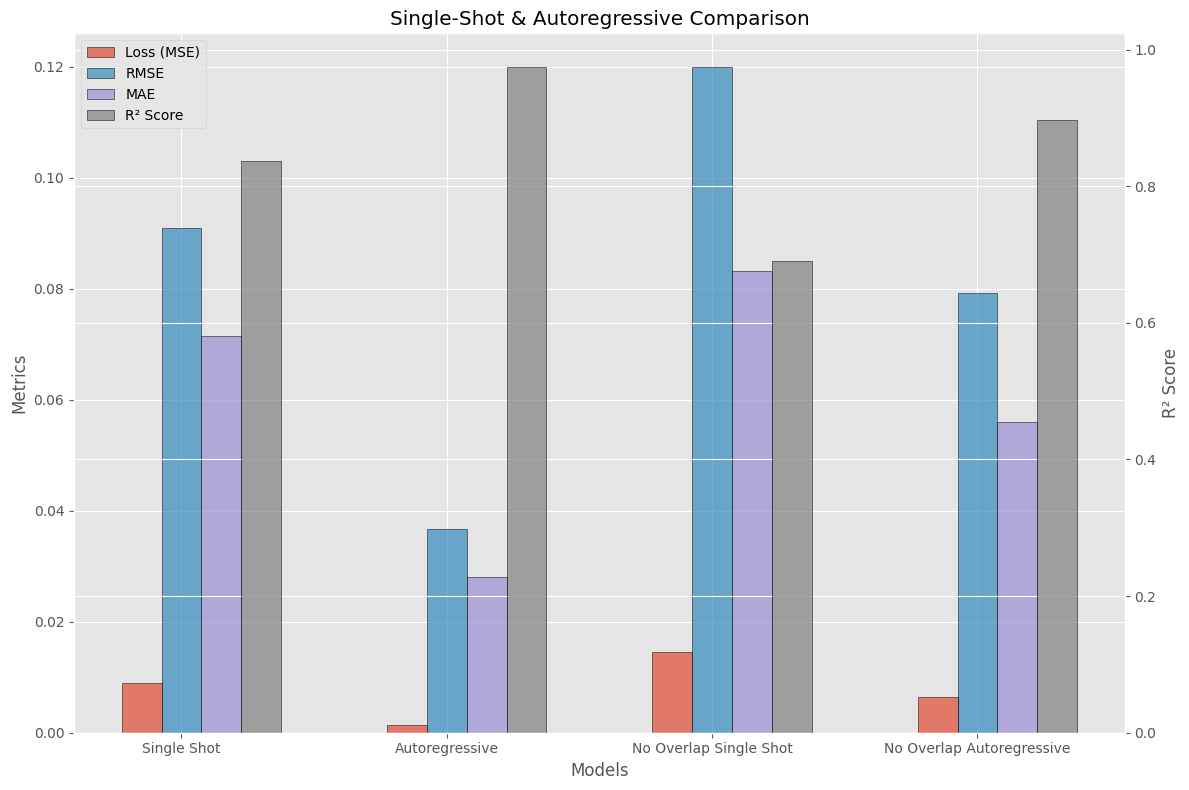

In [9]:
import matplotlib.pyplot as plt

models = ['Single Shot', 'Autoregressive', 'No Overlap Single Shot', 'No Overlap Autoregressive']
loss = [single_shot_metrics[0], auto_regressive_metrics[0], no_overlap_single_shot_metrics[0], no_overlap_ar_metrics[0]]
rmse = [single_shot_metrics[1], auto_regressive_metrics[1], no_overlap_single_shot_metrics[1], no_overlap_ar_metrics[1]]
mae = [single_shot_metrics[2], auto_regressive_metrics[2], no_overlap_single_shot_metrics[2], no_overlap_ar_metrics[2]]
r_squared = [single_shot_metrics[3], auto_regressive_metrics[3], no_overlap_single_shot_metrics[3], no_overlap_ar_metrics[3]]


x = range(len(models))
width = 0.15

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting Loss, RMSE, and MAE with primary y-axis and a higher zorder to bring bars to the front
bars1 = ax1.bar(x, loss, width, label='Loss (MSE)', align='center', alpha=0.7, edgecolor='black', zorder=3)
bars2 = ax1.bar([p + width for p in x], rmse, width, label='RMSE', align='center', alpha=0.7, edgecolor='black', zorder=3)
bars3 = ax1.bar([p + width*2 for p in x], mae, width, label='MAE', align='center', alpha=0.7, edgecolor='black', zorder=3)

ax1.set_xlabel('Models')
ax1.set_ylabel('Metrics')
ax1.set_title('Single-Shot & Autoregressive Comparison')
ax1.set_xticks([p + width for p in x])
ax1.set_xticklabels(models)

# Creating a secondary y-axis for R² scores
ax2 = ax1.twinx()
# Plotting R² bars with a lower zorder to ensure they don't overlap the primary bars
bars4 = ax2.bar([p + width*3 for p in x], r_squared, width, label='R² Score', align='center', alpha=0.7, edgecolor='black', color='grey', zorder=2)
ax2.set_ylabel('R² Score')

# Combining legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('figures/Single-Shot & Autoregressive Comparison.jpg', format='jpg', bbox_inches='tight', dpi = 300)
plt.show()


Model: Single-Shot
Loss (MSE): 0.00904266943258268
RMSE: 0.09099400857532466
MAE: 0.07147906417096103
R² Score: 0.8373687655977177

Model: No Overlap Single-Shot
Loss (MSE): 0.014609364792704582
RMSE: 0.1199866955478986
MAE: 0.08321057508389156
R² Score: 0.6911923817356431

Model: Autoregressive
Loss (MSE): 0.0014563204614980215
RMSE: 0.03675210800159861
MAE: 0.028033807494298176
R² Score: 0.975039394630084

Model: No Overlap Autoregressive
Loss (MSE): 0.006445898053546746
RMSE: 0.07919661949078242
MAE: 0.056023430079221725
R² Score: 0.8965338748142856



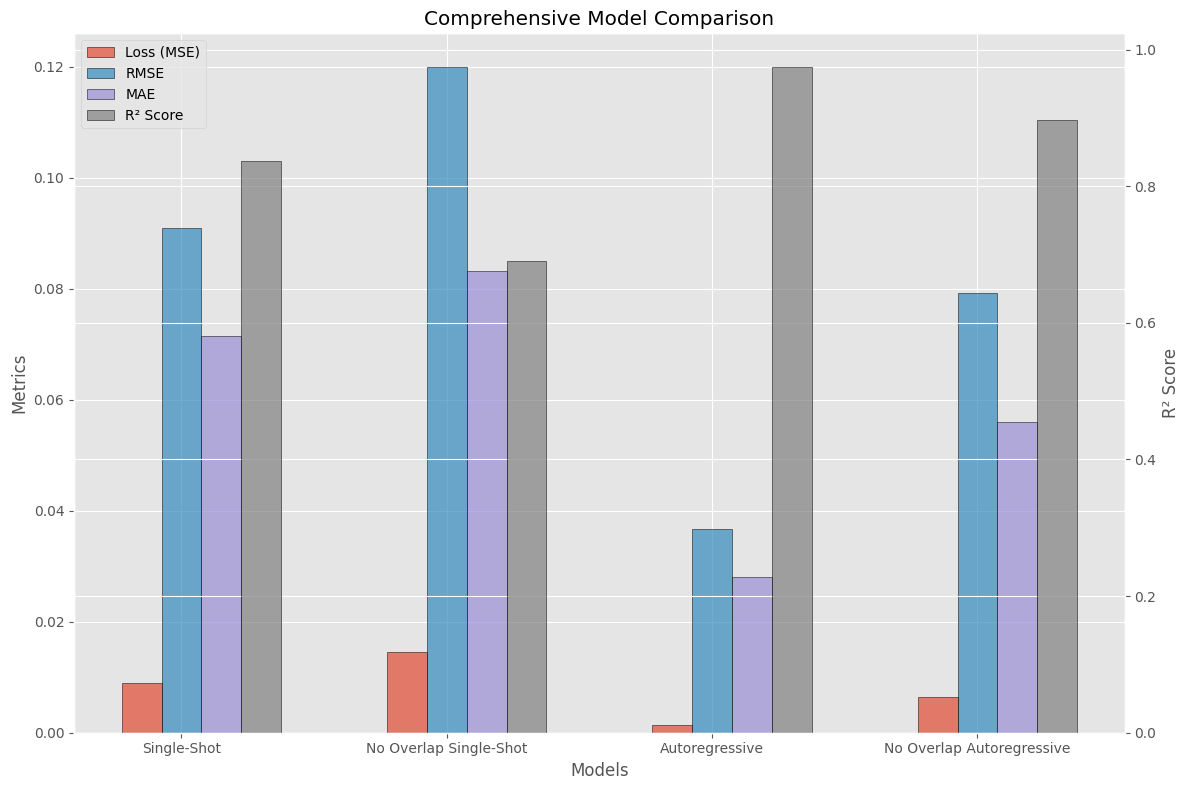

In [12]:
import matplotlib.pyplot as plt

models = ['Single-Shot', 'No Overlap Single-Shot', 'Autoregressive', 'No Overlap Autoregressive']
loss = [single_shot_metrics[0], no_overlap_single_shot_metrics[0], auto_regressive_metrics[0], no_overlap_ar_metrics[0]]
rmse = [single_shot_metrics[1], no_overlap_single_shot_metrics[1], auto_regressive_metrics[1], no_overlap_ar_metrics[1]]
mae = [single_shot_metrics[2], no_overlap_single_shot_metrics[2], auto_regressive_metrics[2], no_overlap_ar_metrics[2]]
r_squared = [single_shot_metrics[3], no_overlap_single_shot_metrics[3], auto_regressive_metrics[3], no_overlap_ar_metrics[3]]

for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"Loss (MSE): {loss[i]}")
    print(f"RMSE: {rmse[i]}")
    print(f"MAE: {mae[i]}")
    print(f"R² Score: {r_squared[i]}\n")

x = range(len(models))
width = 0.15

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting Loss, RMSE, and MAE with primary y-axis and a higher zorder to bring bars to the front
bars1 = ax1.bar(x, loss, width, label='Loss (MSE)', align='center', alpha=0.7, edgecolor='black', zorder=3)
bars2 = ax1.bar([p + width for p in x], rmse, width, label='RMSE', align='center', alpha=0.7, edgecolor='black', zorder=3)
bars3 = ax1.bar([p + width*2 for p in x], mae, width, label='MAE', align='center', alpha=0.7, edgecolor='black', zorder=3)

ax1.set_xlabel('Models')
ax1.set_ylabel('Metrics')
ax1.set_title('Comprehensive Model Comparison')
ax1.set_xticks([p + width for p in x])
ax1.set_xticklabels(models)

# Creating a secondary y-axis for R² scores
ax2 = ax1.twinx()
# Plotting R² bars with a lower zorder to ensure they don't overlap the primary bars
bars4 = ax2.bar([p + width*3 for p in x], r_squared, width, label='R² Score', align='center', alpha=0.7, edgecolor='black', color='grey', zorder=2)
ax2.set_ylabel('R² Score')

# Combining legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('figures/Comprehensive Model Comparison.jpg', format='jpg', bbox_inches='tight', dpi = 300)
plt.show()
